In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

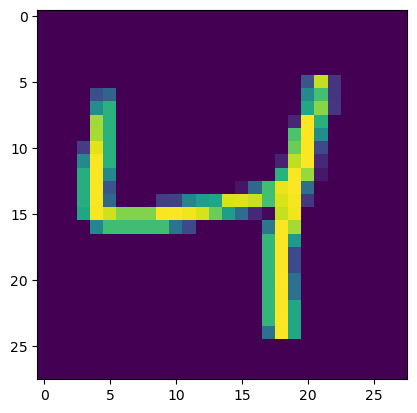

In [4]:
plt.imshow(x_train[2])

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
only_zeros = x_train[y_train==0]

In [7]:
only_zeros.shape

(5923, 28, 28)

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
only_zeros[10]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         28, 195, 254, 254, 254, 254, 254, 255,  61,   0,   0,   0,   0,
          0,   0],
       [  

In [10]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Reshape,Flatten
from tensorflow.keras.models import Sequential

In [11]:
discriminator = Sequential()

discriminator.add(Flatten(input_shape=[28,28]))

discriminator.add(Dense(150,activation = 'relu'))

discriminator.add(Dense(100,activation = 'relu'))

#Final output layer
discriminator.add(Dense(1,activation = 'sigmoid'))

discriminator.compile(loss = 'binary_crossentropy',optimizer='adam')

In [12]:
coding_size = 100

generator = Sequential()

generator.add(Dense(100,activation='relu',input_shape=[coding_size]))

generator.add(Dense(150,activation='relu'))

generator.add(Dense(784,activation = 'relu'))

generator.add(Reshape([28,28]))

In [13]:
GAN = Sequential([generator,discriminator])

In [14]:
discriminator.trainable = False

In [15]:
GAN.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [16]:
#MODEL TRAINING

In [17]:
batch_size = 32

In [18]:
#my_data = x_train

my_data = only_zeros

In [19]:
dataset = tf.data.Dataset.from_tensor_slices(my_data).shuffle(buffer_size=1000)

In [20]:
type(dataset)

tensorflow.python.data.ops.shuffle_op._ShuffleDataset

In [21]:
dataset = dataset.batch(batch_size,drop_remainder=True)

In [22]:
epochs = 1

In [23]:
GAN.layers

In [24]:
GAN.layers[1].layers

In [25]:
GAN.layers[1].summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 150)               117750    
                                                                 
 dense_1 (Dense)             (None, 100)               15100     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 132951 (519.34 KB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 132951 (519.34 KB)
_________________________________________________________________


In [27]:
generator, discriminator = GAN.layers

for epoch in range(epochs):
    print(f"Currently on epoch {epoch+1}")
    i = 0
    
    for x_batch in dataset:
        
        i += 1
        
        if i%100 == 0:
            print(f"\tCurrently on batch number {i} of {len(my_data)//batch_size}")
            
        #Discriminator
        
        noise = tf.random.normal(shape=[batch_size,coding_size])
        
        gen_img = generator(noise)
        
        x_fake_vs_real = tf.concat([gen_img,tf.dtypes.cast(x_batch,tf.float32)], axis = 0)
        
        y1 = tf.constant([[0.0]]*batch_size + [[1.0]]*batch_size)
        
        discriminator.trainable = True
        
        discriminator.train_on_batch(x_fake_vs_real,y1)
        
        #Train Generator
        
        noise = tf.random.normal(shape=[batch_size,coding_size])
        
        y2 = tf.constant([[1.0]]*batch_size)
        
        discriminator.trainable = False
        
        GAN.train_on_batch(noise,y2)
        
        
        

Currently on epoch 1
	Currently on batch number 100 of 185


In [28]:
noise = tf.random.normal(shape=[10,coding_size])

In [29]:
noise.shape

TensorShape([10, 100])

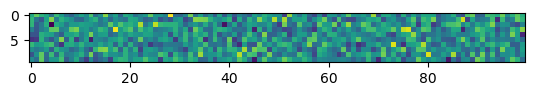

In [30]:
plt.imshow(noise)

In [31]:
images = generator(noise)

In [32]:
images.shape

TensorShape([10, 28, 28])

In [33]:
images[1]

<tf.Tensor: shape=(28, 28), dtype=float32, numpy=
array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 

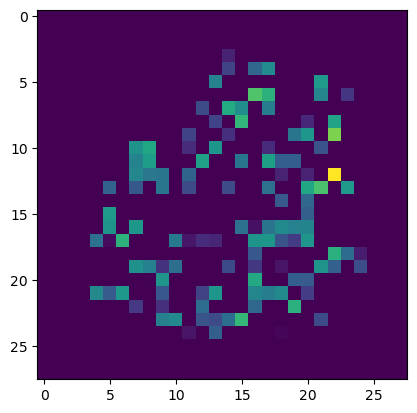

In [34]:
plt.imshow(images[1])

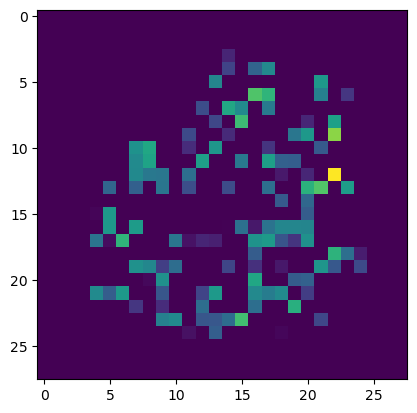

In [36]:
plt.imshow(images[6])